# GroupBy (pacote pandas) - Microdados do ENEM

In [ ]:
import pandas as pd
import matplotlib
import zipfile

In [ ]:
with zipfile.ZipFile('/content/drive/My Drive/microdados_enem2018.zip') as z:
  print(*z.namelist(), sep='\n')

LEIA-ME e DOCUMENTOS TÉCNICOS/
LEIA-ME e DOCUMENTOS TÉCNICOS/edital_enem_2018.pdf
LEIA-ME e DOCUMENTOS TÉCNICOS/matriz_referencia.pdf
LEIA-ME e DOCUMENTOS TÉCNICOS/manual_de_redacao_do_enem_2018.pdf
LEIA-ME e DOCUMENTOS TÉCNICOS/Leia_Me_Enem_2018.pdf
PLANILHAS_TS_ITEM/
PROVAS E GABARITOS/
PROVAS E GABARITOS/ENEM_2018_P1_CAD_02_DIA_1_AMARELO.pdf
PROVAS E GABARITOS/ENEM_2018_P1_CAD_03_DIA_1_BRANCO.pdf
PROVAS E GABARITOS/ENEM_2018_P1_CAD_09_DIA_1_LARANJA_LEDOR.pdf
PROVAS E GABARITOS/ENEM_2018_P1_CAD_10_DIA_1_VERDE_LIBRAS.pdf
PROVAS E GABARITOS/ENEM_2018_P1_CAD_01_DIA_1_AZUL.pdf
PROVAS E GABARITOS/ENEM_2018_P1_CAD_05_DIA_2_AMARELO.pdf
PROVAS E GABARITOS/ENEM_2018_P1_CAD_01_DIA_1_AZUL_AMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2018_P1_CAD_06_DIA_2_CINZA.pdf
PROVAS E GABARITOS/ENEM_2018_P1_CAD_07_DIA_2_AZUL.pdf
PROVAS E GABARITOS/ENEM_2018_P1_CAD_08_DIA_2_ROSA.pdf
PROVAS E GABARITOS/ENEM_2018_P1_CAD_11_DIA_2_LARANJA_LEDOR.pdf
PROVAS E GABARITOS/ENEM_2018_P1_CAD_12_DIA_2_VERDE_LIBRAS.pdf
PROVAS E G

In [ ]:
with zipfile.ZipFile('/content/drive/My Drive/microdados_enem2018.zip') as z:
  with z.open('DADOS/MICRODADOS_ENEM_2018.csv') as f:
    microdadosEnem = pd.read_csv(f, sep=';', encoding='ISO-8859-1', nrows=0)

In [ ]:
microdadosEnem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [ ]:
colunasSelecionadas = ['TP_SEXO', 'NU_NOTA_REDACAO']

In [ ]:
with zipfile.ZipFile('/content/drive/My Drive/microdados_enem2018.zip') as z:
  with z.open('DADOS/MICRODADOS_ENEM_2018.csv') as f:
    microdadosEnemSexoRedacao = pd.read_csv(f, sep=';', encoding='ISO-8859-1', usecols=colunasSelecionadas)

In [ ]:
microdadosEnemSexoRedacao.head()

,TP_SEXO,NU_NOTA_REDACAO
0,M,NaN
1,F,280.0
2,F,NaN
3,F,NaN
4,M,360.0


In [ ]:
# para retirar o 'NOT A NUMBER' (NaN) utiliza-se método dropna do pacote pandas
microdadosEnemSexoRedacao = microdadosEnemSexoRedacao.dropna()

In [ ]:
microdadosEnemSexoRedacao.head()

,TP_SEXO,NU_NOTA_REDACAO
1,F,280.0
4,M,360.0
5,F,580.0
7,M,680.0
8,M,340.0


In [ ]:
# utilizando o Groupby do pandas para ver a distribuição entre masculino e feminino
microdadosEnemSexoRedacao.groupby('TP_SEXO').count()

,NU_NOTA_REDACAO
TP_SEXO,
F,2454691
M,1693573


In [ ]:
# para verificar a nota máxima de cada sexo utilizando o método max do groupby
microdadosEnemSexoRedacao.groupby('TP_SEXO').max()

,NU_NOTA_REDACAO
TP_SEXO,
F,1000.0
M,1000.0


In [ ]:
# para verificar a nota mínima de cada sexo utilizando o método min do groupby
microdadosEnemSexoRedacao.groupby('TP_SEXO').min()

,NU_NOTA_REDACAO
TP_SEXO,
F,0.0
M,0.0


In [ ]:
# observar a nota mínima acima de zero para os sexos
microdadosEnemSexoRedacao[microdadosEnemSexoRedacao.NU_NOTA_REDACAO > 0].groupby('TP_SEXO').min()

,NU_NOTA_REDACAO
TP_SEXO,
F,40.0
M,40.0


In [ ]:
# para verificar a média da nota entre os sexos
microdadosEnemSexoRedacao.groupby('TP_SEXO').mean()

,NU_NOTA_REDACAO
TP_SEXO,
F,512.529145
M,503.102340


In [ ]:
# verificando a mediana da nota entre os sexos
microdadosEnemSexoRedacao.groupby('TP_SEXO').median()

,NU_NOTA_REDACAO
TP_SEXO,
F,520.0
M,520.0


TP_SEXO
F    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
M    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

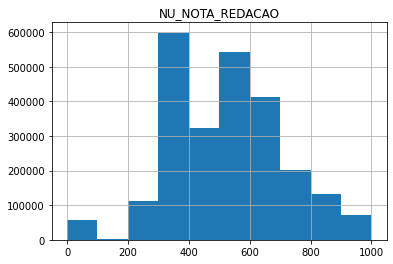

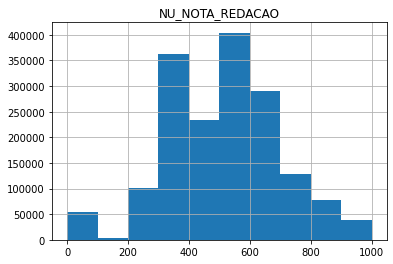

In [ ]:
# plotar um histograma do objeto groupby
microdadosEnemSexoRedacao.groupby('TP_SEXO').hist()

In [ ]:
# utilizando o método describe para uma descrição estatística do groupby
microdadosEnemSexoRedacao.groupby('TP_SEXO').describe()

NU_NOTA_REDACAO                          ...                      
                  count        mean         std  ...    50%    75%     max
TP_SEXO                                          ...                      
F             2454691.0  512.529145  187.440251  ...  520.0  620.0  1000.0
M             1693573.0  503.102340  187.437803  ...  520.0  620.0  1000.0

[2 rows x 8 columns]